## Exploratory Data Analysis and Data Cleaning on Sales Dataset

1. Setup and Data Import

In [ ]:
pip install pandas

import pandas as pd

# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file = 'sales data.xlsx'

2. Initial Data Inspection

In [2]:
# Load Excel data into a pandas DataFrame
df = pd.read_excel(excel_file)

# Now, you can work with the data in the 'df' DataFrame
# For example, you can print the first few rows of the DataFrame
df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,8/23/2020,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,6/26/2019,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,Italy,127075.41,110924.13,9/24/2019,Clothing,Labadie and Sons,Piggy Roscrigg,Joshua Prevost,PC,57-6602854


3. Missing Values Check

In [3]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# To check for missing values in a specific column, you can use:
# missing_values = df['column_name'].isnull().sum()

# Print the columns with missing values and their respective counts
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
order_value_EUR    5
device_type        5
dtype: int64


4. Handling Missing Data

In [ ]:
pip install scikit-learn

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
target_column = 'order_value_EUR'

# Create a SimpleImputer instance to impute missing values with a strategy (e.g., 'mean', 'median', 'most_frequent')
# Other strategies include 'constant' to replace missing values with a constant value
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the selected column and transform it to impute missing values
df[target_column] = imputer.fit_transform(df[[target_column]])

In [7]:
df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        5
order_id           0
dtype: int64

In [8]:
df.device_type

0      Tablet
1      Tablet
2          PC
3      Mobile
4          PC
        ...  
995        PC
996    Tablet
997    Tablet
998        PC
999        PC
Name: device_type, Length: 1000, dtype: object

In [9]:
target_column = 'device_type'

# Create a SimpleImputer instance to impute missing values with a strategy (e.g., 'mean', 'median', 'most_frequent')
# Other strategies include 'constant' to replace missing values with a constant value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the selected column and transform it to impute missing values
df[target_column] = imputer.fit_transform(df[[target_column]])

In [10]:
df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        0
order_id           0
dtype: int64

In [11]:
df.dtypes

country             object
order_value_EUR    float64
cost                object
date                object
category            object
customer_name       object
sales_manager       object
sales_rep           object
device_type         object
order_id            object
dtype: object

In [12]:
# Sample variable containing mixed data
mixed_data = df['cost']

# Create an empty list to store non-numeric values
non_numeric_values = []

# Iterate through the elements in the variable
for value in mixed_data:
    if isinstance(value, str) and not value.isnumeric():
        non_numeric_values.append(value)

# Print the non-numeric values
print("Non-Numeric Values:")
print(non_numeric_values)

Non-Numeric Values:
['XXX']


In [13]:
mask = (df['cost'] == 'XXX')

# Remove rows that match the mask
df = df[~mask]

In [14]:
df['cost'] = df['cost'].astype(float)

# Print the DataFrame with the corrected data type
print(df.dtypes)

country             object
order_value_EUR    float64
cost               float64
date                object
category            object
customer_name       object
sales_manager       object
sales_rep           object
device_type         object
order_id            object
dtype: object


In [15]:
df['date'] = df['date'].astype('datetime64')

In [16]:
df.dtypes

country                    object
order_value_EUR           float64
cost                      float64
date               datetime64[ns]
category                   object
customer_name              object
sales_manager              object
sales_rep                  object
device_type                object
order_id                   object
dtype: object

In [17]:
df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,Italy,127075.41,110924.13,2019-09-24,Clothing,Labadie and Sons,Piggy Roscrigg,Joshua Prevost,PC,57-6602854


5. Data Cleaning and Transformation

In [18]:
# Identify duplicate rows based on all columns
duplicates = df[df.duplicated()]

# Print duplicate rows
print("Duplicate Rows:")
duplicates

Duplicate Rows:


,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id


In [19]:
# Remove duplicate rows, keeping the first occurrence
df_no_duplicates = df.drop_duplicates()

# Print the DataFrame without duplicates
print("DataFrame without Duplicates:")
df_no_duplicates

DataFrame without Duplicates:


,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,Italy,127075.41,110924.13,2019-09-24,Clothing,Labadie and Sons,Piggy Roscrigg,Joshua Prevost,PC,57-6602854
...,...,...,...,...,...,...,...,...,...,...
995,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531
996,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807
997,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396
998,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031


In [20]:
cleaned_data = df_no_duplicates

In [21]:
cleaned_data.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,Italy,127075.41,110924.13,2019-09-24,Clothing,Labadie and Sons,Piggy Roscrigg,Joshua Prevost,PC,57-6602854


In [22]:
df_sorted = df.sort_values(by='cost', ascending=True)

In [23]:
df_sorted

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
421,Sweden,15100.57,12113.68,2019-02-20,Games,"Murray, Reichel and Nolan",Maxie Marrow,Tarrah Castelletti,PC,89-2424262
274,France,16388.90,13430.70,2020-03-15,Electronics,West-Cummings,Othello Bowes,Crysta Halls,PC,30-9690927
16,Sweden,15817.05,13743.44,2019-10-03,Clothing,Kihn Inc,Maxie Marrow,Anita Woakes,PC,26-9787272
970,Netherlands,105374.44,14102.75,2020-07-02,Clothing,Johns and Sons,Denice Amberg,Nero Harbisher,PC,38-5910704
137,Sweden,17524.02,14122.61,2020-12-02,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,02-3364199
...,...,...,...,...,...,...,...,...,...,...
765,Sweden,325331.99,264592.51,2019-12-23,Games,Altenwerth-Konopelski,Maxie Marrow,Caro Morfield,Mobile,57-4142025
241,Luxembourg,312928.72,270401.71,2019-12-12,Beauty,Altenwerth-Konopelski,Ilsa Kob,Jocelyn Laurentino,Tablet,98-5257166
412,Netherlands,353925.06,287528.72,2020-04-12,Clothing,Corwin and Sons,Denice Amberg,Nero Harbisher,PC,36-2694099
83,Ireland,361182.87,288368.40,2019-02-12,Books,Smith Group,Glenine Suttaby,Bunnie Tonbridge,PC,44-1953194


In [24]:
France_df = df[df['country'] == 'France']

In [25]:
France_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
6,France,96795.99,81395.75,2019-06-21,Appliances,Connelly-Mohr,Othello Bowes,Avrit Chanders,PC,32-3124563
15,France,65193.88,53113.45,2019-04-10,Beauty,Friesen and Sons,Othello Bowes,Maighdiln Upcraft,PC,74-1131921
17,France,54079.04,45031.62,2020-05-29,Games,"Lueilwitz, Kerluke and Lesch",Othello Bowes,Avrit Chanders,PC,15-6838362
...,...,...,...,...,...,...,...,...,...,...
992,France,167072.72,135044.88,2019-10-21,Clothing,O'Connell-Mitchell,Othello Bowes,Ora Grennan,PC,37-6449638
993,France,157932.84,134148.15,2020-01-31,Games,"Schowalter, Lesch and Beahan",Othello Bowes,Amelina Piscopiello,PC,30-2982340
995,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531
996,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807


In [26]:
France_Games_df = df[(df['country'] == 'France') & (df['category'] == 'Games')]

In [27]:
France_Games_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
17,France,54079.04,45031.62,2020-05-29,Games,"Lueilwitz, Kerluke and Lesch",Othello Bowes,Avrit Chanders,PC,15-6838362
49,France,149500.61,125401.11,2020-07-24,Games,McGlynn-Bergstrom,Othello Bowes,Crysta Halls,PC,60-8646184
103,France,146325.53,118333.46,2020-09-08,Games,Stehr-Bogan,Othello Bowes,Crysta Halls,PC,95-8015610
136,France,133754.65,106147.69,2020-09-18,Games,Armstrong-Little,Othello Bowes,Ora Grennan,PC,52-3150154
235,France,101318.72,86657.90,2019-04-13,Games,Hilll-Vandervort,Othello Bowes,Maighdiln Upcraft,PC,54-5705354
258,France,18326.41,15067.97,2019-03-02,Games,"Schmitt, Purdy and Johnson",Othello Bowes,Ora Grennan,PC,25-6638623
302,France,82697.53,69548.62,2020-12-08,Games,Kihn Inc,Othello Bowes,Avrit Chanders,PC,47-5319780
309,France,74685.85,59166.13,2020-05-23,Games,"Lubowitz, McLaughlin and Erdman",Othello Bowes,Avrit Chanders,PC,68-0176456
345,France,99319.33,79127.71,2020-05-26,Games,Hessel-Stiedemann,Othello Bowes,Amelina Piscopiello,PC,53-3037652


In [28]:
Not_France_df = df[df['country'] != 'France']

In [29]:
Not_France_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
4,Italy,127075.41,110924.13,2019-09-24,Clothing,Labadie and Sons,Piggy Roscrigg,Joshua Prevost,PC,57-6602854
5,Sweden,69681.43,55529.13,2020-01-25,Clothing,Romaguera-Dietrich,Maxie Marrow,Alyosha Meah,PC,78-3301264
7,Portugal,144725.34,115056.65,2019-01-15,Smartphones,Wisoky Inc,Celine Tumasian,Aurelie Wren,PC,92-7042708
...,...,...,...,...,...,...,...,...,...,...
989,Portugal,52209.31,41480.30,2019-03-26,Beauty,McClure Inc,Celine Tumasian,Corene Shirer,PC,05-2772504
990,Portugal,125253.59,108269.20,2020-02-17,Smartphones,"Murray, Reichel and Nolan",Celine Tumasian,Corene Shirer,PC,90-2194359
994,Netherlands,95575.75,75504.84,2020-12-23,Books,Hessel-Stiedemann,Denice Amberg,Nero Harbisher,PC,35-9372764
998,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031


In [30]:
# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file = 'Extra Variable.xlsx'

# Load Excel data into a pandas DataFrame
extra_vars = pd.read_excel(excel_file)

# Now, you can work with the data in the 'df' DataFrame
# For example, you can print the first few rows of the DataFrame
extra_vars.head()

,order_id,refund
0,70-0511466,43621
1,77-3489084,13385
2,65-8218141,69535
3,29-5478106,90064
4,57-6602854,61736


In [31]:
merged_df = cleaned_data.merge(extra_vars, on='order_id')

In [32]:
merged_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,Italy,127075.41,110924.13,2019-09-24,Clothing,Labadie and Sons,Piggy Roscrigg,Joshua Prevost,PC,57-6602854,61736
...,...,...,...,...,...,...,...,...,...,...,...
994,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531,27600
995,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807,69762
996,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396,60614
997,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031,23360


In [33]:
# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file = 'Extra Data.xlsx'

# Load Excel data into a pandas DataFrame
extra_data = pd.read_excel(excel_file)

# Now, you can work with the data in the 'df' DataFrame
# For example, you can print the first few rows of the DataFrame
extra_data.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,17524.02,14122.61,2020-12-02 00:00:00,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,7964
1,France,64827.80,56043.63,1/20/2019,Appliances,Gislason-Stanton,Othello Bowes,Maighdiln Upcraft,PC,62-3312495,4974
2,Portugal,71620.08,62245.01,2019-05-02 00:00:00,Books,Schoen-Keeling,Celine Tumasian,Smitty Culverhouse,NaN,69-6259390,2809
3,Portugal,74532.02,59752.32,2020-02-04 00:00:00,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183,4260
4,Portugal,78461.13,63537.82,2020-10-05 00:00:00,Appliances,Hessel-Stiedemann,Celine Tumasian,Smitty Culverhouse,Mobile,91-4126746,6038


In [34]:
final_df = pd.concat([merged_df, extra_data], ignore_index=True)

In [35]:
final_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23 00:00:00,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15 00:00:00,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26 00:00:00,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,Italy,127075.41,110924.13,2019-09-24 00:00:00,Clothing,Labadie and Sons,Piggy Roscrigg,Joshua Prevost,PC,57-6602854,61736
...,...,...,...,...,...,...,...,...,...,...,...
1004,Spain,84900.24,73701.90,7/14/2020,Clothing,"Farrell, Swaniawski and Crist",Emalia Dinse,Perri Aldersley,PC,60-6998932,7598
1005,Finland,116563.40,92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,2928
1006,UK,156585.22,126599.15,8/30/2020,Accessories,"Hermiston, Simonis and Wisoky",Jessamine Apark,Winny Agnolo,PC,64-5761908,9376
1007,Spain,178763.42,146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,5153


In [36]:
#What is the primary country of residence for the majority of our customers?

country_frequencies = final_df['country'].value_counts()

In [37]:
country_frequencies

Portugal       242
France         233
Sweden         183
UK             102
Finland         45
Ireland         43
Bulgaria        30
Spain           28
Netherlands     28
Germany         24
Luxembourg      22
Denmark         11
Italy           10
Belgium          6
Austria          2
Name: country, dtype: int64

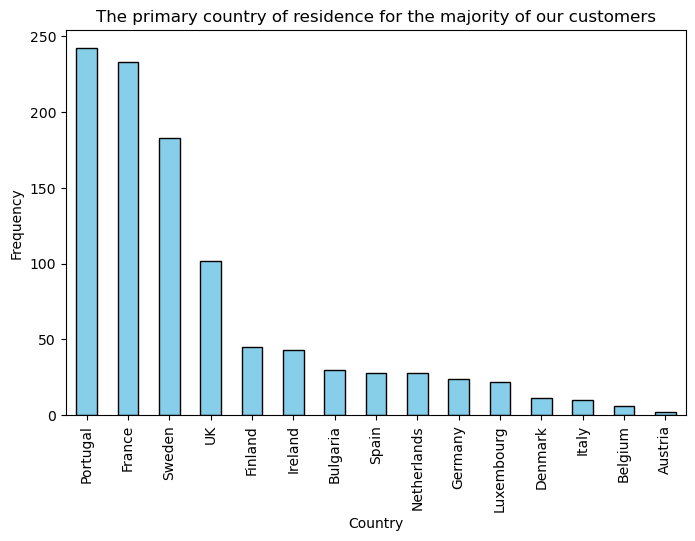

In [38]:
import matplotlib.pyplot as plt
# Create a bar plot for the frequencies
plt.figure(figsize=(8, 5))
country_frequencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('The primary country of residence for the majority of our customers')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

6. Basic Data Exploration and Descriptives

In [39]:
#Which product category has the highest frequency of sales?

productcat_frequencies = final_df['category'].value_counts()
productcat_frequencies

Clothing       157
Games          140
Electronics    134
Appliances     133
Books          119
Beauty         116
Smartphones     95
Outdoors        50
Accessories     36
Other           29
Name: category, dtype: int64

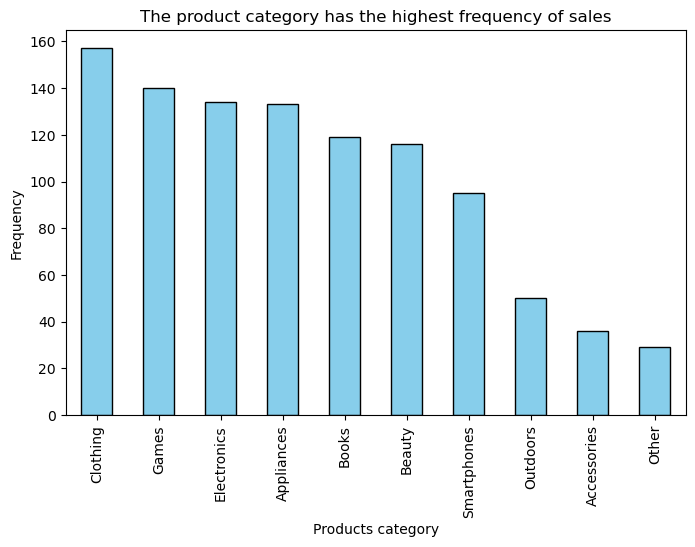

In [40]:
# Create a bar plot for the frequencies
plt.figure(figsize=(8, 5))
productcat_frequencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('The product category has the highest frequency of sales')
plt.xlabel('Products category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [41]:
#Identify the top 5 customers with the most repeat purchases.

customers_frequencies = final_df['customer_name'].value_counts()
customers_frequencies

Johns and Sons                       143
Hessel-Stiedemann                     57
Swaniawski, Runolfsson and Green      25
Dickinson, Hyatt and Berge            24
Murray, Reichel and Nolan             23
                                    ... 
Baumbach Group                         2
Parisian, Steuber and Satterfield      2
Gorczany-Lehner                        1
Lind, Mueller and Stoltenberg          1
Littel-Blick                           1
Name: customer_name, Length: 75, dtype: int64

In [42]:
#Who among the sales managers has achieved the highest number of sales?

salesman_frequencies = final_df['sales_manager'].value_counts()
salesman_frequencies

Celine Tumasian     242
Othello Bowes       233
Maxie Marrow        183
Jessamine Apark     102
Hube Corey           45
Glenine Suttaby      43
Charil Alpe          30
Emalia Dinse         28
Denice Amberg        28
Rickard Doogood      24
Ilsa Kob             22
Modestia Byfford     11
Piggy Roscrigg       10
Lambert Norheny       6
Orsa Geekin           2
Name: sales_manager, dtype: int64

In [43]:
#Who are the top 5 sales representatives with the highest number of sales?

salesrep_frequencies = final_df['sales_rep'].value_counts()
salesrep_frequencies

Amelina Piscopiello    56
Corene Shirer          53
Aurelie Wren           52
Hortense Gerring       52
Ora Grennan            50
Crysta Halls           47
Smitty Culverhouse     44
Avrit Chanders         43
Brynn Dempster         41
Alyosha Meah           40
Madelon Bront          40
Winny Agnolo           39
Tarrah Castelletti     38
Genevra Charrisson     37
Maighdiln Upcraft      37
Anita Woakes           36
Caro Morfield          29
Nero Harbisher         28
Jay Morefield          26
Casie MacBain          24
Wat Bowkley            24
Bunnie Tonbridge       23
Jocelyn Laurentino     22
Mellicent Mattys       21
Palm Wetherald         20
Bernadine Fullagar     15
Shermy McGready        15
Perri Aldersley        13
Joshua Prevost         10
Bertha Walbrook        10
Case Desorts            6
Collin Mackness         6
Manuel Goudie           5
Cobby Andersen          5
Bank Coumbe             2
Name: sales_rep, dtype: int64

In [44]:
#Which device is predominantly used for making product purchases?

devtype_frequencies = final_df['device_type'].value_counts()
devtype_frequencies

PC        789
Mobile    145
Tablet     74
Name: device_type, dtype: int64

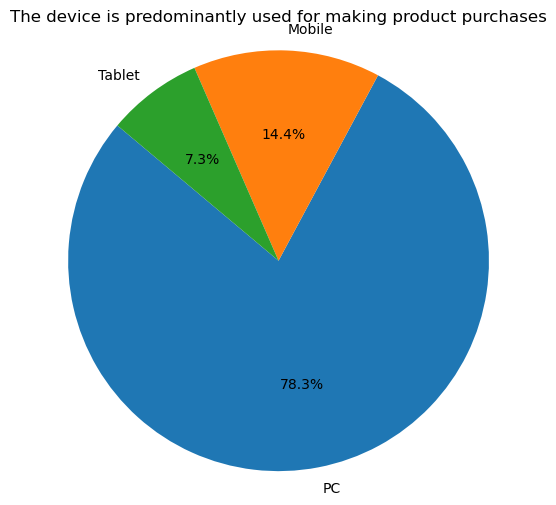

In [45]:
# Calculate relative frequencies (percentages)
devtype_percentages = (devtype_frequencies / devtype_frequencies.sum()) * 100

# Create a pie chart for the percentages
plt.figure(figsize=(6, 6))
plt.pie(devtype_percentages, labels=devtype_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('The device is predominantly used for making product purchases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [46]:
#Find the descriptives of order value, cost and refund.

numeric_columns = ['order_value_EUR', 'cost', 'refund']

# Perform descriptive analysis for the specific numeric variables
numeric_summary = final_df[numeric_columns].describe()
numeric_summary

,order_value_EUR,cost,refund
count,1009.000000,1009.000000,1009.000000
mean,113267.968434,94422.763518,49236.007929
std,61615.855852,51693.620772,28744.989463
min,15100.570000,12113.680000,1009.000000
25%,65760.390000,54635.770000,24597.000000
50%,105374.440000,86928.030000,48652.000000
75%,151012.120000,126080.020000,74664.000000
max,383996.760000,304701.430000,99539.000000


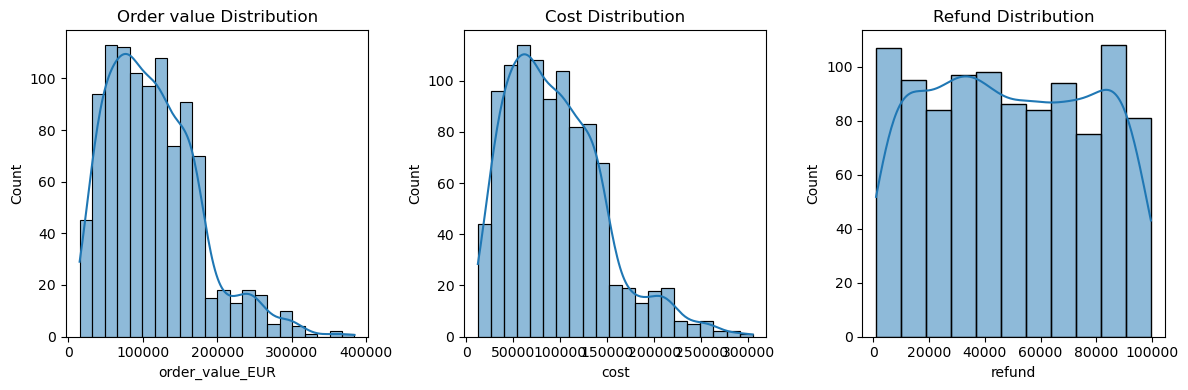

In [47]:
import seaborn as sns

# Create a figure with three subplots for the numeric variables
plt.figure(figsize=(12, 4))

# Plot the distribution of 'Age' in the first subplot
plt.subplot(131)  # 1 row, 3 columns, first subplot
sns.histplot(final_df['order_value_EUR'], kde=True)
plt.title('Order value Distribution')

# Plot the distribution of 'Salary' in the second subplot
plt.subplot(132)  # 1 row, 3 columns, second subplot
sns.histplot(final_df['cost'], kde=True)
plt.title('Cost Distribution')

# Plot the distribution of 'Experience' in the third subplot
plt.subplot(133)  # 1 row, 3 columns, third subplot
sns.histplot(final_df['refund'], kde=True)
plt.title('Refund Distribution')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

7. Outlier Detection and Treatment

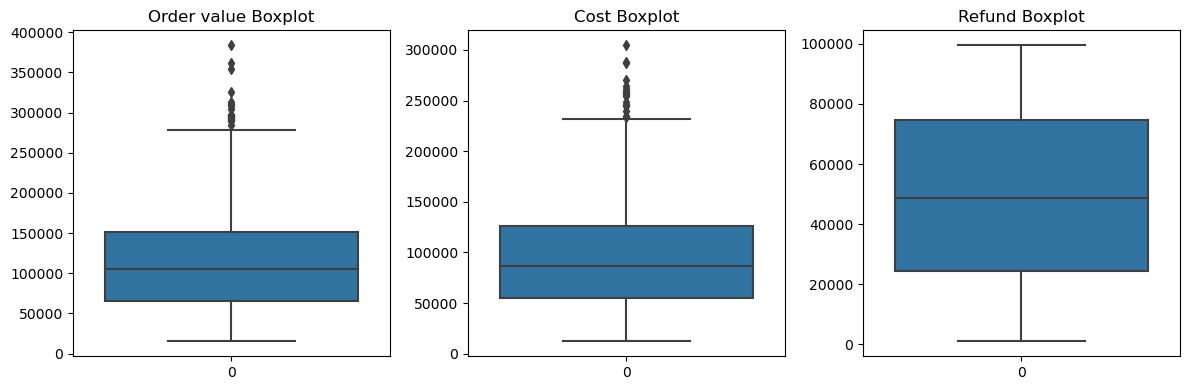

In [48]:
# Create a figure with three subplots for the boxplots
plt.figure(figsize=(12, 4))

# Plot the boxplot for 'Age' in the first subplot
plt.subplot(131)  # 1 row, 3 columns, first subplot
sns.boxplot(data=final_df['order_value_EUR'])
plt.title('Order value Boxplot')

# Plot the boxplot for 'Salary' in the second subplot
plt.subplot(132)  # 1 row, 3 columns, second subplot
sns.boxplot(data=final_df['cost'])
plt.title('Cost Boxplot')

# Plot the boxplot for 'Experience' in the third subplot
plt.subplot(133)  # 1 row, 3 columns, third subplot
sns.boxplot(data=final_df['refund'])
plt.title('Refund Boxplot')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

In [49]:
#Identify the top 3 product categories based on both order value and cost.

median_order_value = final_df.groupby('category')['order_value_EUR'].median()
median_order_value.sort_values(ascending = False)

category
Accessories    139619.740
Outdoors       111875.915
Smartphones    111639.290
Games          108125.365
Clothing       103726.570
Beauty         103345.925
Appliances     100978.490
Electronics     99809.630
Books           99518.860
Other           77087.840
Name: order_value_EUR, dtype: float64

In [50]:
median_cost = final_df.groupby('category')['cost'].median()
median_cost.sort_values(ascending = False)

category
Accessories    116395.415
Smartphones     96566.370
Outdoors        94660.390
Games           92756.590
Clothing        86581.390
Beauty          86442.810
Books           84761.750
Appliances      84128.530
Electronics     83245.005
Other           65894.690
Name: cost, dtype: float64

In [51]:
#Determine the top 3 customers who contribute the most to profitability and have the highest expenses.

median_customers = final_df.groupby('customer_name')['order_value_EUR'].median()
median_customers.sort_values(ascending = False)

customer_name
Schuster Inc                     201573.230
Tromp LLC                        172340.860
Jacobson, Marvin and Brown       158011.300
O'Connell-Mitchell               156441.185
West-Cummings                    153823.740
                                    ...    
Rath-Schroeder                    69664.885
Homenick-Marvin                   57748.435
Lind, Mueller and Stoltenberg     57115.990
Lueilwitz, Kerluke and Lesch      54079.040
Gorczany-Lehner                   33724.530
Name: order_value_EUR, Length: 75, dtype: float64

In [52]:
median_customers_cost = final_df.groupby('customer_name')['cost'].median()
median_customers_cost.sort_values(ascending = False)

customer_name
Schuster Inc                     163052.820
Jacobson, Marvin and Brown       137390.830
Tromp LLC                        136562.900
West-Cummings                    129258.090
O'Connell-Mitchell               129090.565
                                    ...    
Rath-Schroeder                    56826.990
Lind, Mueller and Stoltenberg     48976.960
Homenick-Marvin                   46504.600
Lueilwitz, Kerluke and Lesch      45031.620
Gorczany-Lehner                   26770.530
Name: cost, Length: 75, dtype: float64

In [53]:
#Which sales representative's transactions resulted in the highest amount of refunds to customers?

median_sales_rep = final_df.groupby('sales_rep')['refund'].median()
median_sales_rep.sort_values(ascending = False)

sales_rep
Mellicent Mattys       65788.0
Corene Shirer          65117.0
Jay Morefield          63302.5
Winny Agnolo           60180.0
Bernadine Fullagar     59556.0
Palm Wetherald         55253.5
Jocelyn Laurentino     54422.5
Hortense Gerring       54201.5
Joshua Prevost         53876.5
Amelina Piscopiello    51615.5
Madelon Bront          50451.5
Collin Mackness        49281.5
Anita Woakes           48598.0
Brynn Dempster         48333.0
Wat Bowkley            48265.0
Shermy McGready        48238.0
Nero Harbisher         47320.5
Maighdiln Upcraft      46850.0
Genevra Charrisson     46381.0
Bertha Walbrook        46047.5
Aurelie Wren           46036.0
Avrit Chanders         45035.0
Tarrah Castelletti     43647.5
Bank Coumbe            42433.0
Alyosha Meah           41807.5
Ora Grennan            40519.0
Casie MacBain          40373.5
Crysta Halls           39735.0
Smitty Culverhouse     39691.5
Bunnie Tonbridge       38062.0
Caro Morfield          37786.0
Perri Aldersley        37358.

In [77]:
#Who are the most loyal customers of your superstore?

# Create a pivot table based on median sales, cost, and counts for each product category
pivot_table = df.pivot_table(index='customer_name',
                             values=['order_value_EUR', 'cost'],
                             aggfunc={'order_value_EUR': 'median', 'cost': 'median', 'customer_name': 'count'})

# Rename the columns for clarity
pivot_table = pivot_table.rename(columns={'order_value_EUR': 'Median_Sales',
                                          'cost': 'Median_Cost',
                                          'customer_name': 'Count'})

# Print the pivot table
sorted_pivot_table = pivot_table.sort_values(by = 'Count', ascending = False)
top_10 = sorted_pivot_table[0:10]
top_10

,Median_Cost,Count,Median_Sales
customer_name,,,
Johns and Sons,86679.665,142,105900.99
Hessel-Stiedemann,80342.700,55,98322.98
"Swaniawski, Runolfsson and Green",84690.350,25,100094.97
"Dickinson, Hyatt and Berge",85886.100,24,104540.68
"Murray, Reichel and Nolan",71501.100,23,88832.28
"Rowe, Hermiston and Kessler",66065.680,22,77690.89
Kihn Inc,66742.150,22,80450.08
Tillman and Sons,75839.400,21,91350.76
Wisoky Inc,94336.180,21,115226.80


8. Data Visualization (Exploratory Plots)

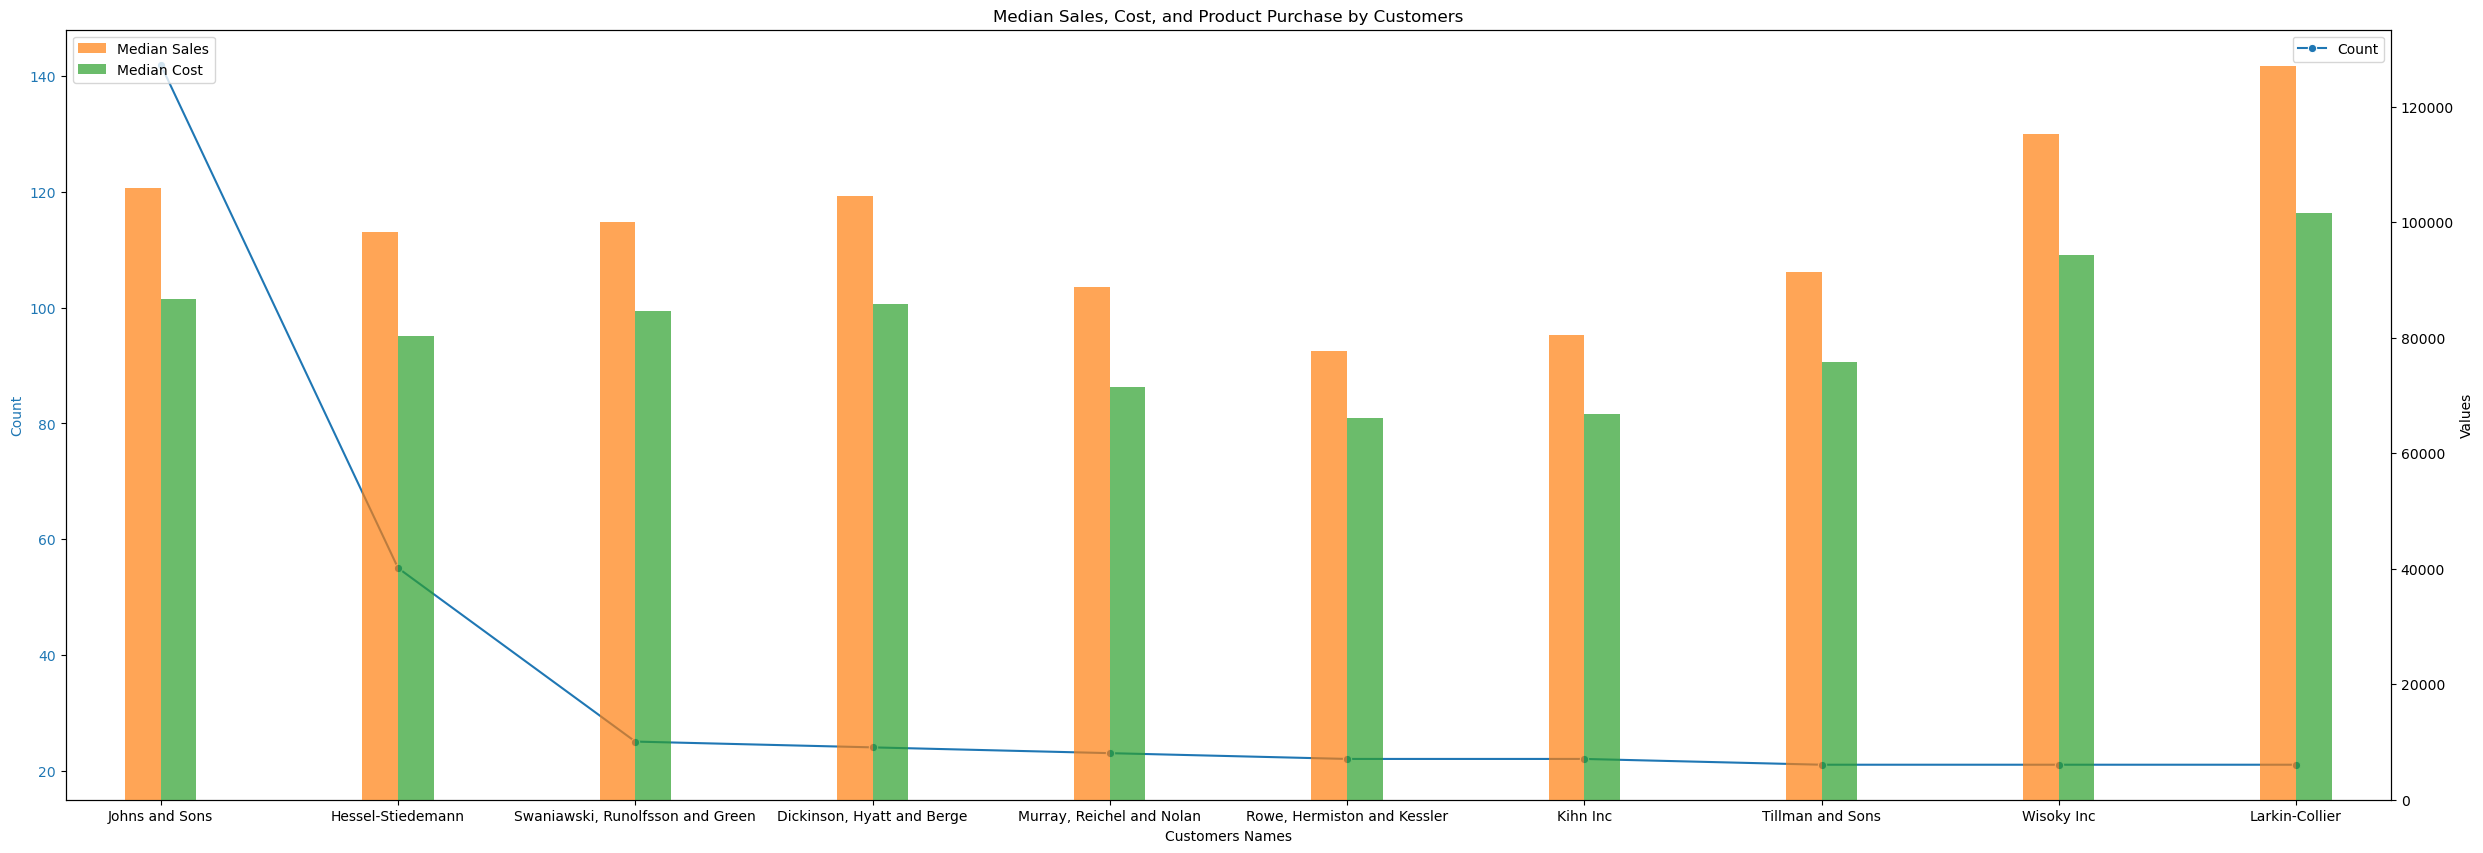

In [80]:
# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(30, 10))

# Plot the count in a line plot
sns.lineplot(data=top_10['Count'], marker='o', ax=ax1, color='tab:blue', label='Count')
ax1.set_xlabel('Customers Names')
ax1.set_ylabel('Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the bar plots
ax2 = ax1.twinx()

# Plot the median sales and median cost in bar plots
bar_plot = top_10[['Median_Sales', 'Median_Cost']].plot(kind='bar', ax=ax2, width=0.3, color=['tab:orange', 'tab:green'], alpha=0.7)
ax2.set_ylabel('Values', color='black')
ax2.tick_params(axis='y', labelcolor='black')
bar_plot.set_xticklabels(top_10.index, rotation=90, ha='center')

# Customize the plot
plt.title('Median Sales, Cost, and Product Purchase by Customers')
ax2.legend(loc='upper left', labels=['Median Sales', 'Median Cost'])

# Show the plot
plt.show()

In [81]:
#Under which sales manager, which product category has the highest sales volume?

crosstab = pd.crosstab(final_df['sales_manager'], final_df['category'])
crosstab

category,Accessories,Appliances,Beauty,Books,Clothing,Electronics,Games,Other,Outdoors,Smartphones
sales_manager,,,,,,,,,,
Celine Tumasian,8,30,27,27,40,28,40,6,13,23
Charil Alpe,1,4,2,6,3,4,5,0,2,3
Denice Amberg,0,2,1,4,6,4,4,0,2,5
Emalia Dinse,0,1,4,1,5,7,5,2,1,2
Glenine Suttaby,1,3,6,3,6,7,6,2,3,6
Hube Corey,1,8,6,2,8,5,12,1,2,0
Ilsa Kob,2,2,3,3,3,2,3,0,2,2
Jessamine Apark,7,11,10,14,18,8,14,2,10,8
Lambert Norheny,1,2,0,0,1,0,1,0,0,1


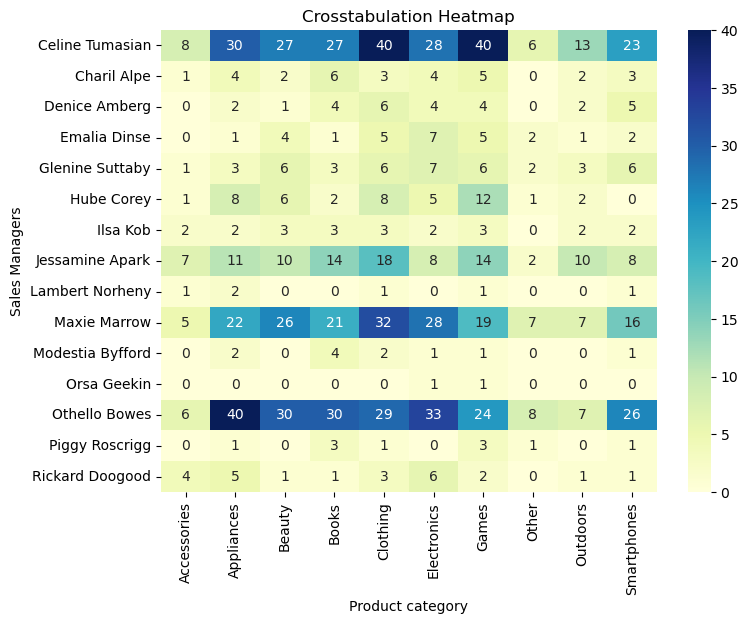

In [82]:
# Visualize the crosstabulation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Crosstabulation Heatmap')
plt.xlabel('Product category')
plt.ylabel('Sales Managers')

# Show the plot
plt.show()

In [ ]:
#In which country did a particular sales representative achieve the highest sales volume?

crosstab_sales_rep = pd.crosstab(final_df['sales_rep'], final_df['country'])

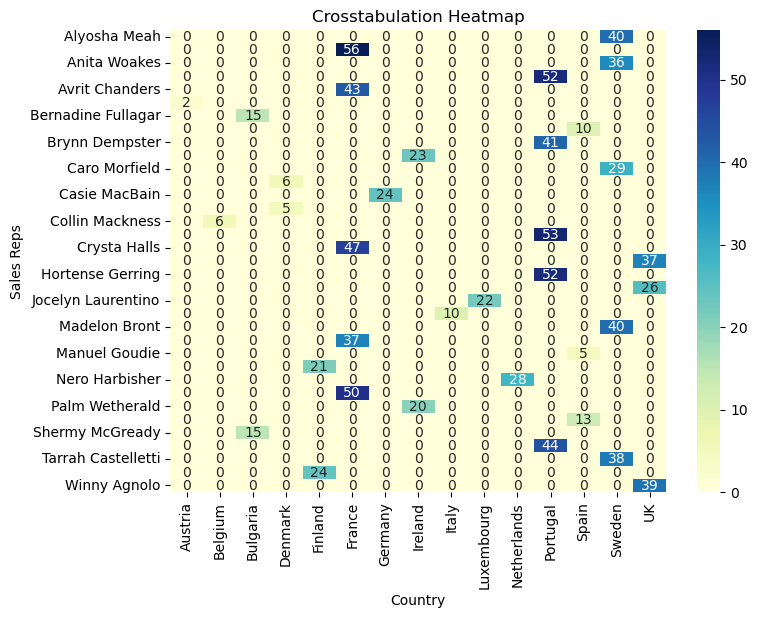

In [84]:
# Visualize the crosstabulation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_sales_rep, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Crosstabulation Heatmap')
plt.xlabel('Country')
plt.ylabel('Sales Reps')

# Show the plot
plt.show()

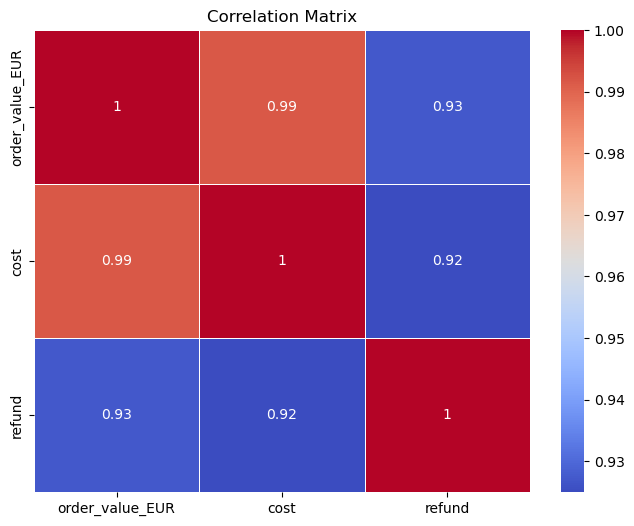

In [85]:
#Find the relationship between order value, cost and refund amount.

# Calculate the correlation matrix
correlation_matrix = final_df[['order_value_EUR', 'cost', 'refund']].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()